# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

# Read Data 

In [2]:
df_cleaned = pd.read_csv('stock_prices_cleaned.csv')
# Convert 'Date' to datetime format 
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
# filter for MSFT only
msft_df = df_cleaned[df_cleaned['Ticker'] == 'MSFT'].copy()
print(f"shape: {msft_df.shape}")
msft_df.head()

shape: (6287, 14)


,Date,Ticker,Volume,High,Low,Open,Close,target_next_close,daily_return,moving_avg_5,moving_avg_10,volatility_5,target_next_close_lag1,target_next_close_lag2
3,2000-01-04,MSFT,54119000.0,35.965019,34.468076,34.871099,34.583225,6.142899,-0.008255,26.418554,24.478230,20.672186,34.583225,10.991455
10,2000-01-05,MSFT,64059600.0,35.734739,33.585281,34.122645,34.947884,6.238340,0.024184,27.054326,24.429291,21.626976,34.947884,10.815354
17,2000-01-06,MSFT,54976600.0,34.967077,33.278217,34.448904,33.777199,6.117468,-0.019499,26.712288,24.478498,21.144206,33.777199,11.211577
24,2000-01-07,MSFT,62013600.0,34.468084,32.951949,33.354972,34.218594,6.169904,0.025892,26.928021,24.399342,21.069915,34.218594,11.094179
31,2000-01-10,MSFT,44963600.0,34.909512,34.199423,34.832746,34.468105,6.257297,-0.010468,27.397319,24.645101,21.868895,34.468105,11.343651


# Data Pre-processing 

In [3]:
# Select features and target
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
target_col = 'target_next_close'
# Drop any rows with missing values
msft_df = msft_df[feature_cols + [target_col, 'Date']].dropna()

In [4]:
# Scale the features and target
sc = MinMaxScaler(feature_range=(0, 1))
# Apply scaling to all numeric columns (excluding Date)
arr_scaled = sc.fit_transform(msft_df.drop(columns=['Date']))

# Convert the scaled result back into a DataFrame for easier handling
df_scaled = pd.DataFrame(arr_scaled, columns=feature_cols + [target_col])

In [5]:
df_scaled.shape

(6287, 6)

In [6]:
# Creating Features and Target
X = df_scaled.iloc[:, :5].values  
y = df_scaled.iloc[:, 5:].values 

In [7]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (6287, 5)
y shape: (6287, 1)


In [8]:
split = int(0.70 * len(X))  # 70% for training
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [9]:
X_train.shape, y_train.shape

((4400, 5), (4400, 1))

In [10]:
# Define a plotting function for time series data
def show_plot(data, title):
    plt.figure(figsize=(13, 5))
    plt.plot(data, linewidth=2.5)
    plt.title(title)
    plt.xlabel("Time Index")
    plt.ylabel("Scaled Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


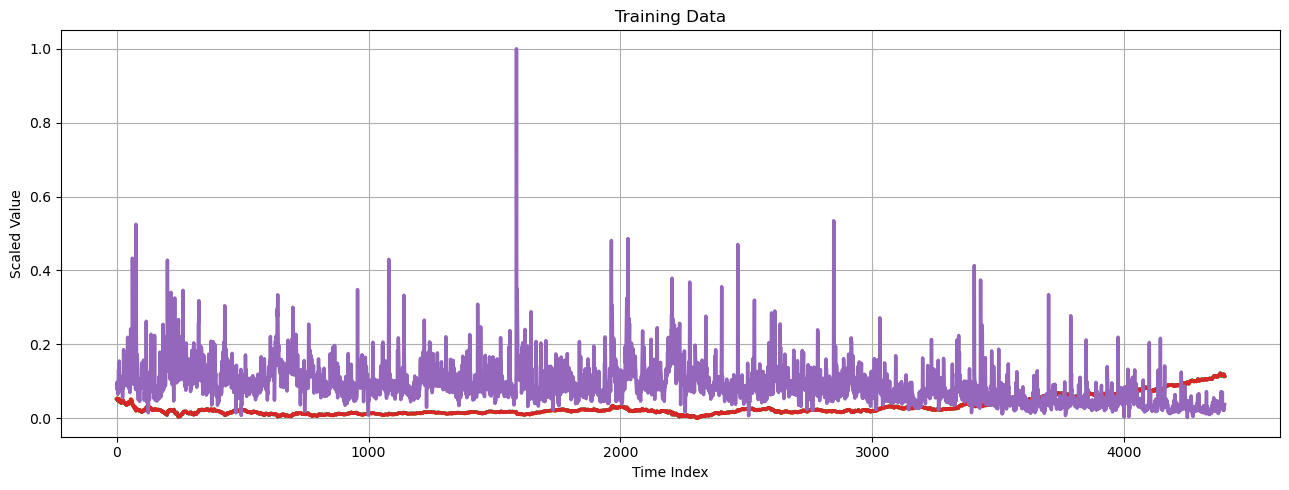

In [11]:
# Visualize the training and testing feature data
show_plot(X_train, 'Training Data')


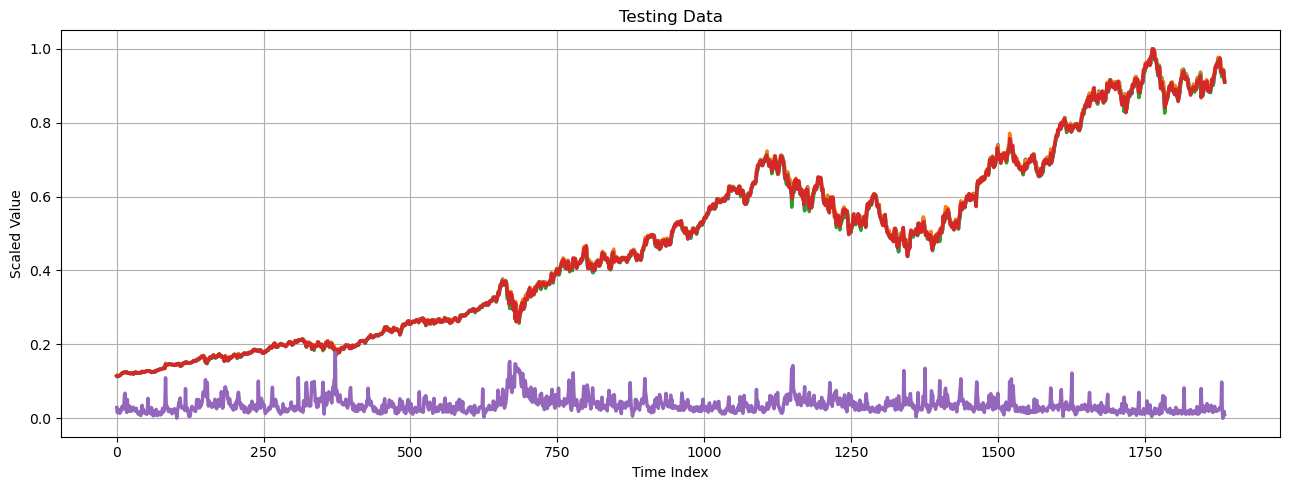

In [12]:
show_plot(X_test, 'Testing Data')

In [13]:
# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [14]:
# Make predictions and evaluate
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 6.1741
R² Score: -717.0371


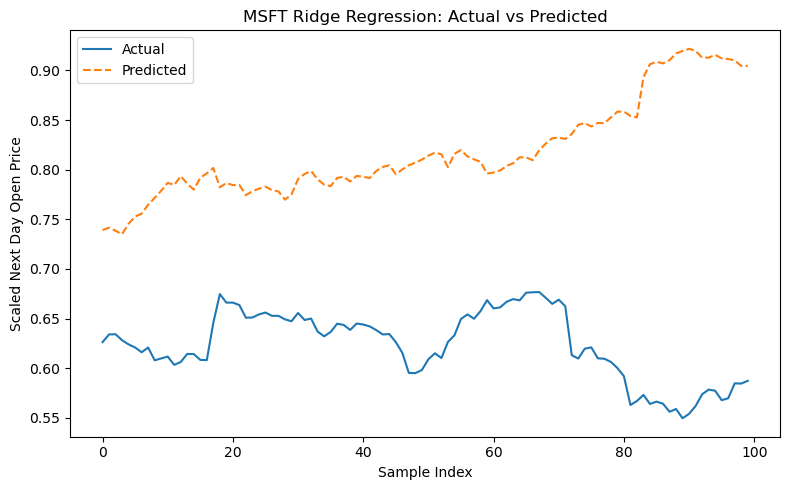

In [16]:
# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted', linestyle='dashed')
plt.title("MSFT Ridge Regression: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Scaled Next Day Open Price")
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Extract the true target (last column) from y_test
y_true = y_test[:, -1]
y_pred = y_pred  # already predicted values

# Calculate metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print results
print(f"Ridge Regression Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R² Score: {r2:.6f}")


Ridge Regression Performance Metrics:
Mean Squared Error (MSE): 6.174134
Root Mean Squared Error (RMSE): 2.484780
Mean Absolute Error (MAE): 2.087592
R² Score: -717.037066
